Enter Book Title:  PYTHON BASIC
Enter Author Name:  JOHN DEO
Enter Genre:  PROGRAMMING
Enter Price:  450
Enter Quantity:  20


 Book successfully added


Enter Book Title:  AI GUIDE
Enter Author Name:  ALAN TURING
Enter Genre:  AI
Enter Price:  800
Enter Quantity:  10


 Book successfully added

 Inventory Report
{'Title': 'PYTHON BASIC', 'Author': 'JOHN DEO', 'Genre': 'PROGRAMMING', 'Price': 450.0, 'Quantity': 20}
{'Title': 'AI GUIDE', 'Author': 'ALAN TURING', 'Genre': 'AI', 'Price': 800.0, 'Quantity': 10}


Enter Book Title to Update:  PYTHON BASIC
Enter Quantity to Add:  5


 Inventory updated

 Inventory Report
{'Title': 'PYTHON BASIC', 'Author': 'JOHN DEO', 'Genre': 'PROGRAMMING', 'Price': 450.0, 'Quantity': 25}
{'Title': 'AI GUIDE', 'Author': 'ALAN TURING', 'Genre': 'AI', 'Price': 800.0, 'Quantity': 10}

 Total Revenue: 5550
 Average Revenue: 1850.0


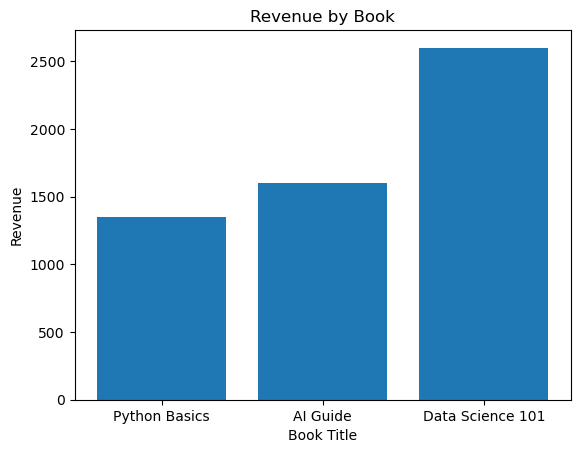

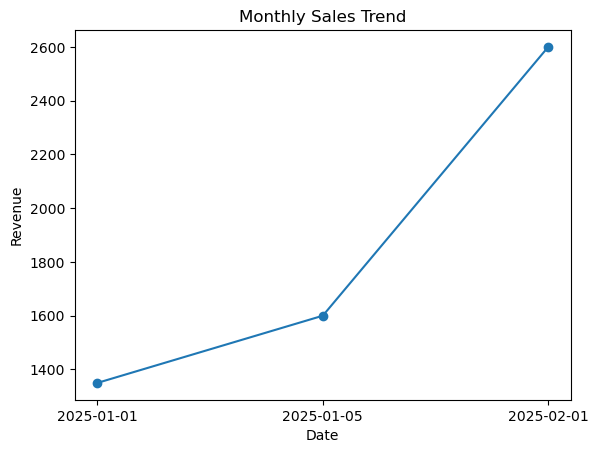

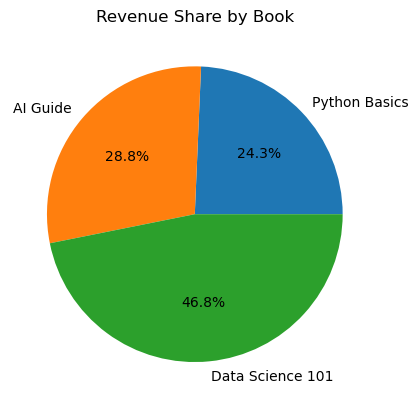

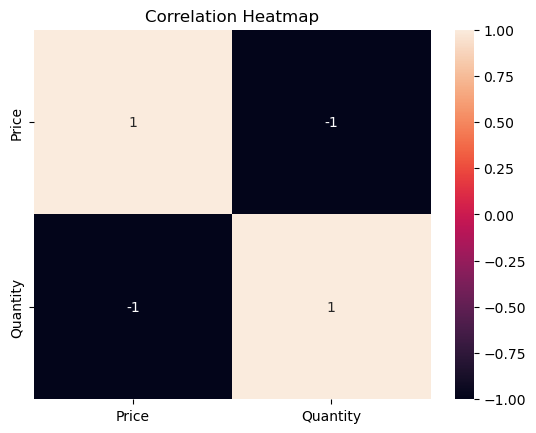

In [7]:

# bookstore_system.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


class Bookstore:
    def __init__(self):
        self.inventory = []

    # Add new book
    def add_book(self):
        title = input("Enter Book Title: ")
        author = input("Enter Author Name: ")
        genre = input("Enter Genre: ")
        price = float(input("Enter Price: "))
        quantity = int(input("Enter Quantity: "))
        
        if price <= 0 or quantity <= 0:
            print(" Price and Quantity are positive")
            return

        book = {
            "Title": title,
            "Author": author,
            "Genre": genre,
            "Price": price,
            "Quantity": quantity
        }
        self.inventory.append(book)
        print(" Book successfully added")

    # Update stock
    
    def update_inventory(self):
        title = input("Enter Book Title to Update: ")
        qty = int(input("Enter Quantity to Add: "))
        
        for book in self.inventory:
            if book["Title"] == title:
                book["Quantity"] += qty
                print(" Inventory updated")
                return
        print("Book not found")

    def show_inventory(self):
        print("\n Inventory Report")
        for book in self.inventory:
            print(book)
            
    # Record sale
    def record_sale(self, title, quantity):
        for book in self.inventory:
            if book["Title"] == title:
                if book["Quantity"] >= quantity:
                    book["Quantity"] -= quantity
                    revenue = book["Price"] * quantity
                    print(f" Sale recorded | Revenue: ₹{revenue}")
                    return revenue
                else:
                    print(" Not enough stock")
                    return 0
        print(" Book not found")
        return 0

    # Report
    def generate_report(self):
        print("\n Inventory Report")
        for book in self.inventory:
            print(book)


# ---------------- MAIN PROGRAM ---------------- #

store = Bookstore()

store.add_book()

store.add_book()

store.show_inventory()

store.update_inventory()

store.show_inventory()



# ---------------- PANDAS & NUMPY ---------------- #

# Create sample inventory DataFrame
inventory_df = pd.DataFrame(store.inventory)
inventory_df.to_csv(r"inventory.csv", index=False)

# Sample sales data
sales_data = {
    "Date": ["2025-01-01", "2025-01-05", "2025-02-01"],
    "Title": ["Python Basics", "AI Guide", "Data Science 101"],
    "Quantity Sold": [3, 2, 4],
    "Total Revenue": [1350, 1600, 2600]
}

sales_df = pd.DataFrame(sales_data)
sales_df.to_csv("sales.csv", index=False)

# Calculations using NumPy
total_revenue = np.sum(sales_df["Total Revenue"])
avg_revenue = np.mean(sales_df["Total Revenue"])

print("\n Total Revenue:", total_revenue)
print(" Average Revenue:", avg_revenue)


# ---------------- VISUALIZATION ---------------- #

# Bar Chart – Revenue by Book
plt.figure()
plt.bar(sales_df["Title"], sales_df["Total Revenue"])
plt.title("Revenue by Book")
plt.xlabel("Book Title")
plt.ylabel("Revenue")
plt.show()

# Line Chart – Sales Trend
plt.figure()
plt.plot(sales_df["Date"], sales_df["Total Revenue"], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

# Pie Chart – Revenue Share
plt.figure()
plt.pie(sales_df["Total Revenue"], labels=sales_df["Title"], autopct="%1.1f%%")
plt.title("Revenue Share by Book")
plt.show()

# Heatmap – Price vs Quantity
plt.figure()
sns.heatmap(inventory_df[["Price", "Quantity"]].corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()